In [19]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score
%matplotlib inline

In [4]:
data = pd.read_csv('input/training_set _processed.csv',header=0)
data.head()

,txid,amount,shopper_country,issuer_country,sc_ic_same,shopper_email,creation_date,card_number_hash,time_diff_usage,card_person_used_before,txvariantcode,is_cc,bin,fraud
0,27,19995,US,US,1,393760459@qq.com,3/14/2016 16:01,095f4r715f8765,999,0,mccredit,1,558764,0
1,8,1999,(unknown),US,0,5931313455@qq.com,3/14/2016 15:25,0a6388ca9b96c,999,0,mccredit,1,558764,0
2,36,1999,US,US,1,hui.neng@yahoo.co.hk,3/14/2016 16:39,0eg0f95bc1738,999,0,visadebit,0,453245,0
3,33,1810,MX,MX,1,leah.doherty@yahoo.com,3/14/2016 16:35,18f832r5e585d,999,0,visagold,1,420567,0
4,10,3499,GB,GB,1,qm87945@cam.ac.uk,3/14/2016 15:27,21f53773f74df2,999,0,visadebit,0,434256,0


In [5]:
data.columns

Index(['txid', 'amount', 'shopper_country', 'issuer_country', 'sc_ic_same',
       'shopper_email', 'creation_date', 'card_number_hash', 'time_diff_usage',
       'card_person_used_before', 'txvariantcode', 'is_cc', 'bin', 'fraud'],
      dtype='object')

In [6]:
X_train = data[['amount','sc_ic_same','shopper_country', 'issuer_country','time_diff_usage',
              'card_person_used_before','is_cc', 'fraud']]

In [7]:
X_train.head()

,amount,sc_ic_same,shopper_country,issuer_country,time_diff_usage,card_person_used_before,is_cc,fraud
0,19995,1,US,US,999,0,1,0
1,1999,0,(unknown),US,999,0,1,0
2,1999,1,US,US,999,0,0,0
3,1810,1,MX,MX,999,0,1,0
4,3499,1,GB,GB,999,0,0,0


In [8]:
#Apply one hot encoder for categorical variables
X_train_ohe = pd.get_dummies(X_train, columns=['shopper_country','issuer_country'])

In [9]:
X_train_ohe.head()

,amount,sc_ic_same,time_diff_usage,card_person_used_before,is_cc,fraud,shopper_country_(unknown),shopper_country_CA,shopper_country_GB,shopper_country_MX,shopper_country_US,issuer_country_CA,issuer_country_GB,issuer_country_MX,issuer_country_US
0,19995,1,999,0,1,0,0,0,0,0,1,0,0,0,1
1,1999,0,999,0,1,0,1,0,0,0,0,0,0,0,1
2,1999,1,999,0,0,0,0,0,0,0,1,0,0,0,1
3,1810,1,999,0,1,0,0,0,0,1,0,0,0,1,0
4,3499,1,999,0,0,0,0,0,1,0,0,0,1,0,0


In [10]:
X = X_train_ohe.loc[:, X_train_ohe.columns != 'fraud']
y = X_train_ohe['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [11]:
tpot = TPOTClassifier(generations=10, population_size=50, verbosity=2,scoring='accuracy')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('adyen_fraud.py')

Optimization Progress:  18%|█▊        | 100/550 [00:32<02:13,  3.38pipeline/s]

Generation 1 - Current best internal CV score: 0.85


Optimization Progress:  27%|██▋       | 150/550 [01:02<02:07,  3.15pipeline/s]

Generation 2 - Current best internal CV score: 0.875


Optimization Progress:  36%|███▋      | 200/550 [01:16<01:40,  3.49pipeline/s]

Generation 3 - Current best internal CV score: 0.875


Optimization Progress:  45%|████▌     | 250/550 [01:34<01:44,  2.88pipeline/s]

Generation 4 - Current best internal CV score: 0.875


Optimization Progress:  55%|█████▍    | 300/550 [01:54<01:18,  3.17pipeline/s]

Generation 5 - Current best internal CV score: 0.875


Optimization Progress:  64%|██████▎   | 350/550 [02:18<01:10,  2.82pipeline/s]

Generation 6 - Current best internal CV score: 0.875


Optimization Progress:  73%|███████▎  | 400/550 [02:50<01:19,  1.89pipeline/s]

Generation 7 - Current best internal CV score: 0.875


Optimization Progress:  82%|████████▏ | 450/550 [03:27<00:47,  2.11pipeline/s]

Generation 8 - Current best internal CV score: 0.875


Optimization Progress:  91%|█████████ | 500/550 [04:05<00:28,  1.76pipeline/s]

Generation 9 - Current best internal CV score: 0.875


Generation 10 - Current best internal CV score: 0.875

Best pipeline: RandomForestClassifier(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.9, min_samples_leaf=20, min_samples_split=12, n_estimators=100), bootstrap=True, criterion=entropy, max_features=0.25, min_samples_leaf=7, min_samples_split=16, n_estimators=100)
0.9


True

In [20]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.9000000000000001, min_samples_leaf=20, min_samples_split=12, n_estimators=100)),
    RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.25, min_samples_leaf=7, min_samples_split=16, n_estimators=100)
)

exported_pipeline.fit(X,y)
results = exported_pipeline.predict(X)

In [21]:
accuracy_score(y,results)

0.81999999999999995

In [22]:
#AUC_ROC
roc_auc_score(y,results)

0.75183823529411764

In [23]:
average_precision_score(y,results) 

0.76034090909090923

In [24]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, results)
roc_auc = auc(false_positive_rate, true_positive_rate)

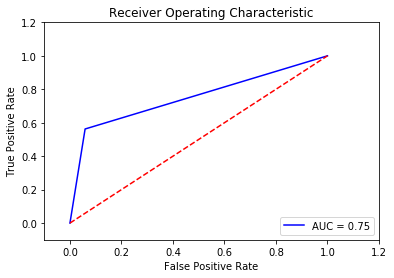

In [25]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()